# World Series Projections

In this post we'll use the model from my previous post [Hierarchical Bayesian Ranking](https://dantegates.github.io/2018/09/20/hierarchical-bayesian-ranking.html) to project the world series winner.

# Likelihood of RedSox winning world series

In my previous post I demonstrated how to use Bayesian inference to rank professional baseball teams. The gist of the approach to include parameters in our model that represented each team's ability to win baseball games. For the purpose of ranking the teams we were only concerned with these learned abilities. However, the model also included parameters representing the probability that one team will win over another which can be used to forecast the likelihood that the Red Sox will win the world series. To recap our model looked like

$$
\begin{align*}
& wins_{1}\sim Binomial(n=n_{1, 2}, p=p_{1}) \\
& wins_{2}\sim Binomial(n=n_{1, 2}, p=p_{2}) \\
& p\sim Dirichlet(a_{1} + h_{1}, a_{2}) \\
& a_{i}\sim Normal(\mu, \sigma) \\
& h_{i}\sim Normal(0, 1) \\
& \mu\sim Normal(3, 1) \\
& \sigma\sim Uniform(0, 2)
\end{align*}
$$

Obtaining the projection with the fit model is as simple performing a monte carlo simulation of the world series where the outcomes of the games in the series are simulated by sampling the probability that the Red Sox will beat the Dodgers at home for games 1-2, 6-7 and the probability that they will beat the Dodgers away for games 3-5 from the model posterior. The simulation gives us an estimate of the probability that the Red Sox will win and looks like

1. For each game in the series sample from the model posterior whether Boston will win.
2. Break when either team reaches four wins.
3. Record the outcome and repeat $n$ times.
4. After $n$ trials compute the number of outcomes where boston won over $n$.

While a single iteration of the simulation gives us an estimate of what the probability the Red Sox will win is like, performing several iterations of the simulation can be used to obtain bounds on what that probability is with a 95% [credible interval](https://en.wikipedia.org/wiki/Credible_interval). Remeber the definition of the model posterior $P(\theta \ \vert \ D)\propto P(D \ \vert \ \theta)P(\theta)$ where $\theta=\{wins_{1}, wins_{2}, a_{i}, h_{i}, \mu, \sigma\}$ means that this estimate *is* an actually probability.

I took the model fit from my previous post and ran the experiment described above to obtain the probability the Red Sox will win the world series is between 0.54 and 0.73 with the median probability 0.63 (side note: interestingly enough this estimate is close to [FiveThirtyEight's](https://projects.fivethirtyeight.com/2018-mlb-predictions/) projection from their own simulation).

Lastly, we can visualize the outcomes of the simulation in the histogram below.

/Users/dgates/venvs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


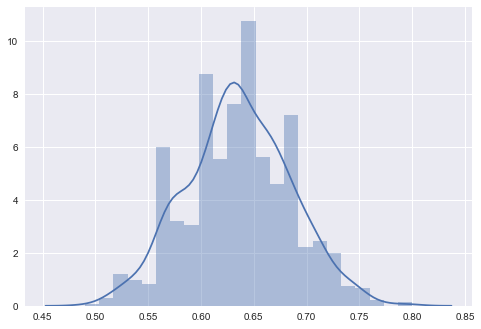

If you are interested in how these projections were actually generated from the fit model the entire notebook behind this post can be found [here](https://github.com/dantegates/mlb-statcast/blob/master/bayesian-ranking-full.ipynb).